##  **Cel projektu**
Celem projektu, jest zbudowanie modelu klasyfikacyjnego, który będzie przewidywał jakie szanse na przeżycie (Niskie lub Wysokie) ma pacjent z
danym typem guza mózgu.

## **Zdefiniowanie problemu predykcyjnego oraz charakterystyka danych**

W projekcie wykorzystano zbiór danych z platformy Kaggle, który zawiera informacje medyczne i demograficzne dotyczące **20 000 pacjentów z guzami mózgu** .
 Zbiór zawiera 20 zmiennych, które można podzielić na następujące grupy:

- **Demograficzne**:
  - `Age`: wiek pacjenta,
  - `Gender`: płeć pacjenta (`Male`, `Female`).

- **Informacje o guzie**:
  - `Tumor_Type`: typ guza (`Malignant`, `Benign`),
  - `Tumor_Size`: rozmiar guza (w cm),
  - `Location`: lokalizacja guza w mózgu (`Frontal`, `Parietal`, `Temporal`, `Occipital`),
  - `Histology`: typ histologiczny (`Astrocytoma`, `Glioblastoma`, `Meningioma`, `Medulloblastoma`),
  - `Stage`: stadium nowotworu (`I`, `II`, `III`, `IV`),
  - `Tumor_Growth_Rate`: tempo wzrostu guza (cm/miesiąc).

- **Objawy**:
  - `Symptom_1`, `Symptom_2`, `Symptom_3`: pierwsze zaobserwowane objawy (`Headache`, `Seizures`, `Nausea`, `Vision Issues`).

- **Leczenie**:
  - `Radiation_Treatment`, `Surgery_Performed`, `Chemotherapy`: informacje, czy pacjent otrzymał dane leczenie (`Yes`, `No`),
  - `Treatment_Response`: reakcja na leczenie (`Improved`, `Stable`, `Worsened`).

- **Inne**:
  - `Patient_ID`: unikalny identyfikator pacjenta.
  - `Family_History`: historia nowotworów w rodzinie (`Yes`, `No`),
  - `MRI_Result`: wynik badania MRI (`Positive`, `Negative`),
  - `Follow_Up_Required`: czy wymagane jest dalsze monitorowanie (`Yes`, `No`).
  - `Survival_Rate`: przewidywana przeżywalność pacjenta (w %).



In [51]:
# @title
import pandas as pd
import numpy as np

In [52]:
# @title
from google.colab import files
uploaded = files.upload()


Saving brain_tumor_dataset.csv to brain_tumor_dataset (1).csv


**Wczytanie pliku csv**

In [53]:
# @title
df = pd.read_csv('brain_tumor_dataset.csv', delimiter=',')
print(df.head())
df

   Patient_ID  Age  Gender Tumor_Type  Tumor_Size  Location        Histology  \
0           1   73    Male  Malignant    5.375612  Temporal      Astrocytoma   
1           2   26    Male     Benign    4.847098  Parietal     Glioblastoma   
2           3   31    Male     Benign    5.588391  Parietal       Meningioma   
3           4   29    Male  Malignant    1.436600  Temporal  Medulloblastoma   
4           5   54  Female     Benign    2.417506  Parietal     Glioblastoma   

  Stage      Symptom_1 Symptom_2 Symptom_3 Radiation_Treatment  \
0   III  Vision Issues  Seizures  Seizures                  No   
1    II       Headache  Headache    Nausea                 Yes   
2     I  Vision Issues  Headache  Seizures                  No   
3    IV  Vision Issues  Seizures  Headache                 Yes   
4     I       Headache  Headache  Seizures                  No   

  Surgery_Performed Chemotherapy  Survival_Rate  Tumor_Growth_Rate  \
0                No           No      51.312579     

,Patient_ID,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Survival_Rate,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required
0,1,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,51.312579,0.111876,No,Positive,Yes
1,2,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,46.373273,2.165736,Yes,Positive,Yes
2,3,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,47.072221,1.884228,No,Negative,No
3,4,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,51.853634,1.283342,Yes,Negative,No
4,5,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,54.708987,2.069477,No,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,58.229662,0.353806,No,Negative,Yes
19996,19997,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,77.706856,2.341074,No,Positive,No
19997,19998,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,89.543803,2.332881,No,Positive,Yes
19998,19999,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,83.306781,2.387202,No,Positive,No


##Czyszczenie danych oraz wstępna selekcja cech

In [54]:
# @title
def categorize_survival(rate):
    if rate <= 50:
        return 'Low'
    else:
        return 'High'

df['Survival_Category'] = df['Survival_Rate'].apply(categorize_survival)


Utworzono binarną zmienną celu zamiast procentowej Survival_Rate, według przyjętego progu 50%.

In [55]:
counts = df['Survival_Category'].value_counts()
print(counts)


Survival_Category
High    16729
Low      3271
Name: count, dtype: int64


Po podziale na kategorie uzykano w pierwszej klasie High 16729 obserwacji, a w drugiej klasie Low jest 3271 obserwacji. Następnie usunięto kolumnę Patinet_ID i Survival_Rate, ponieważ do dalszego modelowania będzie używana tylko Survival_Category.

In [56]:
# @title
df = df.drop("Patient_ID", axis=1)
df = df.drop("Survival_Rate", axis=1)
df

,Age,Gender,Tumor_Type,Tumor_Size,Location,Histology,Stage,Symptom_1,Symptom_2,Symptom_3,Radiation_Treatment,Surgery_Performed,Chemotherapy,Tumor_Growth_Rate,Family_History,MRI_Result,Follow_Up_Required,Survival_Category
0,73,Male,Malignant,5.375612,Temporal,Astrocytoma,III,Vision Issues,Seizures,Seizures,No,No,No,0.111876,No,Positive,Yes,High
1,26,Male,Benign,4.847098,Parietal,Glioblastoma,II,Headache,Headache,Nausea,Yes,Yes,Yes,2.165736,Yes,Positive,Yes,Low
2,31,Male,Benign,5.588391,Parietal,Meningioma,I,Vision Issues,Headache,Seizures,No,No,No,1.884228,No,Negative,No,Low
3,29,Male,Malignant,1.436600,Temporal,Medulloblastoma,IV,Vision Issues,Seizures,Headache,Yes,No,Yes,1.283342,Yes,Negative,No,High
4,54,Female,Benign,2.417506,Parietal,Glioblastoma,I,Headache,Headache,Seizures,No,No,Yes,2.069477,No,Positive,Yes,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,21,Male,Malignant,9.612013,Parietal,Medulloblastoma,III,Seizures,Nausea,Vision Issues,No,No,Yes,0.353806,No,Negative,Yes,High
19996,32,Female,Benign,1.543560,Temporal,Meningioma,III,Headache,Headache,Vision Issues,Yes,Yes,No,2.341074,No,Positive,No,High
19997,57,Female,Benign,3.618634,Temporal,Medulloblastoma,I,Seizures,Vision Issues,Nausea,No,No,Yes,2.332881,No,Positive,Yes,High
19998,68,Male,Malignant,8.519086,Parietal,Glioblastoma,III,Seizures,Headache,Vision Issues,Yes,Yes,Yes,2.387202,No,Positive,No,High


##Podział na zbiór treningowy i testowy

-15% danych zostało przeznaczone na zbiór testowy, czyli 3 000 przypadków.

-Pozostałe 85% danych utworzyło zbiór treningowy, zawierający 17 000 rekordów.


In [57]:
# @title
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df,
    test_size=0.15,
    random_state=42,
    stratify=df['Survival_Category']
)

print("Train:", df_train.shape)
print("Test: ", df_test.shape)

Train: (17000, 18)
Test:  (3000, 18)


##Imputacja braków danych

In [58]:
# @title
print(df.info())
print(df.isnull().sum())

for col in df.columns:
    print(f"{col}: {df[col].unique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  20000 non-null  int64  
 1   Gender               20000 non-null  object 
 2   Tumor_Type           20000 non-null  object 
 3   Tumor_Size           20000 non-null  float64
 4   Location             20000 non-null  object 
 5   Histology            20000 non-null  object 
 6   Stage                20000 non-null  object 
 7   Symptom_1            20000 non-null  object 
 8   Symptom_2            20000 non-null  object 
 9   Symptom_3            20000 non-null  object 
 10  Radiation_Treatment  20000 non-null  object 
 11  Surgery_Performed    20000 non-null  object 
 12  Chemotherapy         20000 non-null  object 
 13  Tumor_Growth_Rate    20000 non-null  float64
 14  Family_History       20000 non-null  object 
 15  MRI_Result           20000 non-null 

**Struktura danych**

Zbiór nie zawiera żadnych brakujących danych. Występują następujące typy danych:

  - `int64`: `Patient_ID`, `Age`
  - `float64`: `Tumor_Size`, `Tumor_Growth_Rate`, `Survival_Rate`
  - `object`: wszystkie pozostałe (zmienne kategoryczne)







##Kodowanie zmiennych binarnych(One- Hot- Encoding)

In [59]:
# @title
df_train['Survival_Category'] = df_train['Survival_Category'].map({'Low':0, 'High':1})
df_test ['Survival_Category'] = df_test ['Survival_Category'].map({'Low':0, 'High':1})

cat_cols = df_train.select_dtypes(include='object').columns.tolist()

df_train = pd.get_dummies(df_train, columns=cat_cols, drop_first=False, dtype=int)
df_test  = pd.get_dummies(df_test,  columns=cat_cols, drop_first=False, dtype=int)

for c in set(df_train.columns) - set(df_test.columns):
    df_test[c] = 0
df_test = df_test[df_train.columns]

outlier_cols = [c for c in df_train.columns if c.endswith('_is_outlier')]
df_train = df_train.drop(columns=outlier_cols)
df_test  = df_test.drop(columns=outlier_cols)

Zmienna Survival_Category została przekształcona na wartości 0 (Low) i 1 (High), aby modele binarnej klasyfikacji mogły ją prawidłowo interpretować.
Wszystkie pozostałe cechy kategoryczne, zarówno dwuwartościowe (np. Gender, Tumor_Type), jak i wielopoziomowe (np. Location, Histology), rozbito na dummy-kolumny, dzięki czemu każda oryginalna kategoria ma własną kolumnę z wartościami 0/1.

Wszystkie nazwy kolumn zostały przedstawione poniżej:

In [60]:
# @title
df_train.columns

Index(['Age', 'Tumor_Size', 'Tumor_Growth_Rate', 'Survival_Category',
       'Gender_Female', 'Gender_Male', 'Tumor_Type_Benign',
       'Tumor_Type_Malignant', 'Location_Frontal', 'Location_Occipital',
       'Location_Parietal', 'Location_Temporal', 'Histology_Astrocytoma',
       'Histology_Glioblastoma', 'Histology_Medulloblastoma',
       'Histology_Meningioma', 'Stage_I', 'Stage_II', 'Stage_III', 'Stage_IV',
       'Symptom_1_Headache', 'Symptom_1_Nausea', 'Symptom_1_Seizures',
       'Symptom_1_Vision Issues', 'Symptom_2_Headache', 'Symptom_2_Nausea',
       'Symptom_2_Seizures', 'Symptom_2_Vision Issues', 'Symptom_3_Headache',
       'Symptom_3_Nausea', 'Symptom_3_Seizures', 'Symptom_3_Vision Issues',
       'Radiation_Treatment_No', 'Radiation_Treatment_Yes',
       'Surgery_Performed_No', 'Surgery_Performed_Yes', 'Chemotherapy_No',
       'Chemotherapy_Yes', 'Family_History_No', 'Family_History_Yes',
       'MRI_Result_Negative', 'MRI_Result_Positive', 'Follow_Up_Required_No'

##Outliery

In [61]:
# @title
num_cols = ['Age', 'Tumor_Size', 'Tumor_Growth_Rate']

for col in num_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_train = df_train[(df_train[col] >= lower_bound) & (df_train[col] <= upper_bound)]

print("Rozmiar zbioru treningowego po usunięciu outlierów:", df_train.shape)

Rozmiar zbioru treningowego po usunięciu outlierów: (17000, 44)


Aby zwiększyć jakość danych treningowych i poprawić skuteczność modelu predykcyjnego, przeprowadzono identyfikację oraz usunięcie wartości odstających  dla trzech zmiennych numerycznych:

- `Age` (wiek pacjenta),
- `Tumor_Size` (rozmiar guza),
- `Tumor_Growth_Rate` (tempo wzrostu guza).

Dla każdej z tych zmiennych zastosowano klasyczną metodę opartą na rozstępie międzykwartylowym, zgodnie ze wzorami:

**lower_bound = Q1 - 1.5 × IQR**

**upper_bound = Q3 + 1.5 × IQR**

Proces nie wykrył żadnych wartości odstających według zastosowanej metody w analizowanych zmiennych numerycznych. Oznacza to, że dane w zbiorze treningowym są dobrze skalibrowane i nie wymagają dalszego czyszczenia pod tym kątem.

## Wykrywanie anomalii z użyciem Isolation Forest

Dodatkowo, poza klasycznym usuwaniem wartości odstających na podstawie rozstępu międzykwartylowego (IQR), zastosowano również algorytm **Isolation Forest** do automatycznego wykrywania anomalii w danych treningowych.

### Etapy procesu:

1. Wybrano wszystkie cechy poza zmienną docelową (`Survival_Category`) jako dane wejściowe dla modelu.
2. Zainicjalizowano model `IsolationForest` z parametrem `contamination=0.01`, co oznacza, że zakładamy ok. 1% obserwacji jako potencjalne anomalie.
3. Przeprowadzono trenowanie modelu na zbiorze treningowym.
4. Model przypisał każdemu rekordowi:
   - **`anomaly_score`** – miarę odstępstwa od normy,
   - **`anomaly_flag`** – klasyfikację: `-1` (anomalia) lub `1` (normalne dane).
5. Na podstawie wyników usunięto obserwacje oznaczone jako anomalie.

### Wyniki:

- Liczba wykrytych anomalii: **170**
- Rozmiar zbioru treningowego przed oczyszczeniem: **17 000**
- Rozmiar zbioru po oczyszczeniu: **16 830**

---

###  Wniosek:

Algorytm `Isolation Forest` skutecznie zidentyfikował 1% danych jako potencjalnie odstające. Ich usunięcie pozwala zwiększyć jakość zbioru treningowego i zmniejszyć ryzyko przetrenowania modelu na nietypowych przypadkach.



In [62]:
# @title
from sklearn.ensemble import IsolationForest

features = [c for c in df_train.columns if c != 'Survival_Category']

iso = IsolationForest(contamination=0.01, random_state=42)

iso.fit(df_train[features])

df_train['anomaly_score'] = iso.decision_function(df_train[features])
df_train['anomaly_flag']  = iso.predict(df_train[features])  # -1 = anomalia, 1 = normalne

n_anom = (df_train['anomaly_flag'] == -1).sum()
#print(f"Wykryto {n_anom} anomalii w zbiorze treningowym.")

df_train_clean = df_train[df_train['anomaly_flag'] == 1].drop(
    ['anomaly_score', 'anomaly_flag'], axis=1
)

#print("Rozmiar przed oczyszczeniem:", df_train.shape[0])
#print("Rozmiar po oczyszczeniu:   ", df_train_clean.shape[0])

df_train = df_train_clean.copy()


## Analiza korelacji zmiennych numerycznych

Aby sprawdzić, czy zmienne numeryczne są ze sobą skorelowane, obliczono macierz korelacji z wykorzystaniem współczynnika **Pearsona** dla trzech kluczowych zmiennych:

- `Age` ,
- `Tumor_Size`,
- `Tumor_Growth_Rate`.


Z obliczonej macierzy korelacji wynika, że wszystkie współczynniki korelacji są bardzo bliskie zera (np. `-0.01`), co oznacza:

- **Brak istotnych liniowych zależności** między badanymi zmiennymi numerycznymi.
- Zmienne te **nieskorelowane**, a więc mogą wnosić niezależne informacje do modelu klasyfikacyjnego.

Dzięki temu można założyć, że nie występuje problem wielokolinearności i wszystkie trzy cechy mogą być uwzględnione w modelu bez ryzyka nadmiarowości informacji.



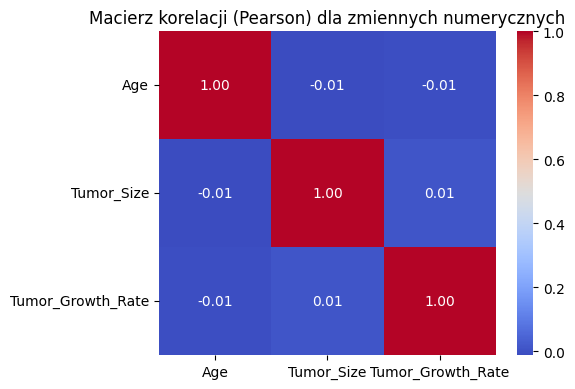

In [63]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Age', 'Tumor_Size', 'Tumor_Growth_Rate']

corr_matrix = df_train[num_cols].corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji (Pearson) dla zmiennych numerycznych')
plt.tight_layout()
plt.show()


## Analiza ważności cech – Random Forest

Aby ocenić, które cechy mają największy wpływ na przewidywanie kategorii przeżycia pacjentów (`Survival_Category`), zastosowano algorytm **Random Forest**. Wykorzystano jedynie zmienne binarne (wcześniej zakodowane jako `0/1`), które odpowiadają m.in. za:

- Płeć (`Gender_*`)
- Typ guza (`Tumor_Type_*`)
- Lokalizację (`Location_*`)
- Histologię (`Histology_*`)
- Etap (`Stage_*`)
- Objawy (`Symptom_*`)
- Leczenie i jego zastosowanie (`Radiation_Treatment`, `Surgery_Performed`, `Chemotherapy`)
- Inne cechy (`Family_History`, `MRI_Result`, `Follow_Up_Required`)


Z obliczonych ważności (`feature_importances_`) wynika, że największy wpływ na przewidywanie mają m.in.:

- `Symptom_2_Nausea`, `Symptom_2_Seizures`, `Symptom_2_Vision Issues` – czyli objawy wtórne,
- `Location_Temporal`, `Location_Parietal`, `Location_Occipital`, `Location_Frontal` – lokalizacja guza,
- `Histology_Glioblastoma`, `Histology_Medulloblastoma` – typ histologiczny,
- `Radiation_Treatment_Yes`, `Surgery_Performed_Yes` – zastosowanie leczenia,
- `Stage_IV`, `Stage_III` – stadium nowotworu.

Cecha została uznana za **istotną**, jeśli jej ważność była **większa niż średnia ważność** wszystkich cech (średnia ≈ 0.025). Na tej podstawie wybrano 23 najbardziej znaczące cechy, które można wykorzystać do dalszego trenowania modeli.

In [64]:
# @title
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

binary_cols = [
    'Gender_Female', 'Gender_Male',
    'Tumor_Type_Benign', 'Tumor_Type_Malignant',
    'Radiation_Treatment_No', 'Radiation_Treatment_Yes',
    'Surgery_Performed_No', 'Surgery_Performed_Yes',
    'Chemotherapy_No', 'Chemotherapy_Yes',
    'Family_History_No', 'Family_History_Yes',
    'MRI_Result_Negative', 'MRI_Result_Positive',
    'Follow_Up_Required_No', 'Follow_Up_Required_Yes',
    'Location_Frontal','Location_Occipital',
    'Location_Parietal','Location_Temporal',
    'Histology_Astrocytoma','Histology_Glioblastoma',
    'Histology_Medulloblastoma','Histology_Meningioma',
    'Stage_I','Stage_II','Stage_III','Stage_IV',
    'Symptom_1_Headache','Symptom_1_Nausea',
    'Symptom_1_Seizures','Symptom_1_Vision Issues',
    'Symptom_2_Headache','Symptom_2_Nausea',
    'Symptom_2_Seizures','Symptom_2_Vision Issues',
    'Symptom_3_Headache','Symptom_3_Nausea',
    'Symptom_3_Seizures','Symptom_3_Vision Issues'
]

X = df_train[binary_cols]
y = df_train['Survival_Category']

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=binary_cols).sort_values(ascending=False)
print("Random Forest – feature_importances_:\n", importances)

mean_imp = importances.mean()
selected_rf = importances[importances > mean_imp].index.tolist()
print(f"\nWybrane cechy (importance > {mean_imp:.3e}):", selected_rf)


Random Forest – feature_importances_:
 Symptom_2_Nausea             0.027510
Symptom_2_Seizures           0.026543
Symptom_2_Vision Issues      0.026346
Location_Temporal            0.026269
Histology_Glioblastoma       0.026216
Location_Parietal            0.026122
Radiation_Treatment_Yes      0.026025
Location_Occipital           0.026012
Location_Frontal             0.025898
Surgery_Performed_Yes        0.025689
Stage_IV                     0.025599
Radiation_Treatment_No       0.025597
Surgery_Performed_No         0.025592
Symptom_2_Headache           0.025439
Histology_Medulloblastoma    0.025251
Symptom_3_Headache           0.025248
MRI_Result_Negative          0.025233
Symptom_1_Seizures           0.025216
Chemotherapy_Yes             0.025130
Stage_III                    0.025127
Family_History_No            0.025089
Family_History_Yes           0.025069
Chemotherapy_No              0.025046
Symptom_3_Seizures           0.024926
MRI_Result_Positive          0.024894
Symptom_3_V

## Analiza udziału lokalizacji guza w kategoriach przeżywalności


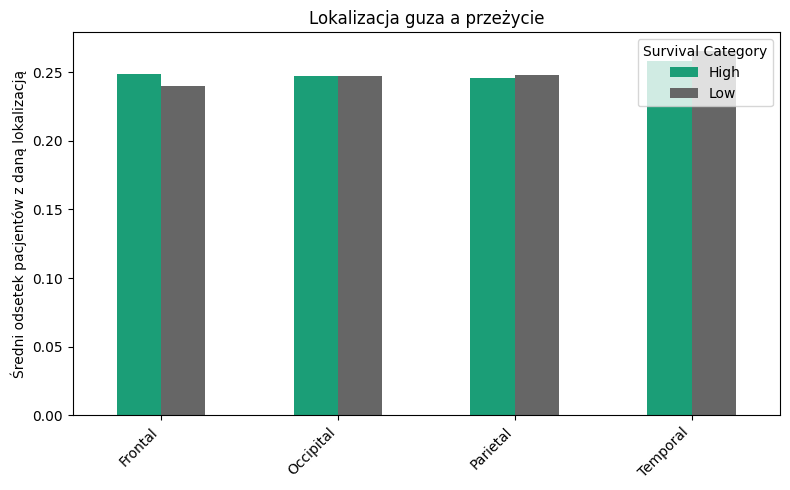

In [66]:
# @title
import matplotlib.pyplot as plt

loc_cols = [c for c in df_train.columns if c.startswith('Location_')]

df_plot = (
    df_train
    .assign(
        Survival_Label = df_train['Survival_Category'].map({0:'Low', 1:'High'})
    )
    .groupby('Survival_Label')[loc_cols]
    .mean()
    .T
)

labels = [lbl.replace('Location_','') for lbl in df_plot.index]

ax = df_plot.plot(
    kind='bar',
    figsize=(8,5),
    colormap='Dark2'
)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_title('Lokalizacja guza a przeżycie')
ax.set_ylabel('Średni odsetek pacjentów z daną lokalizacją')
ax.legend(title='Survival Category')
plt.tight_layout()
plt.show()


Na powyższym wykresie pokazano średni udział pacjentów z guzem w czterech lokalizacjach mózgu (Frontal, Occipital, Parietal, Temporal) w dwóch kategoriach przeżywalności:

- **Frontal**  
  - High: ~24,9 %  
  - Low:  ~24,0 %  
  Różnica ≈ 0,9 pp wskazuje, że guzy czołowe nieco częściej wiążą się z gorszą prognozą.

- **Occipital**  
  - High: ~24,5 %  
  - Low:  ~24,7 %  
  Różnica ≈ –0,2 pp, co sugeruje niemal równy rozkład w tej lokalizacji.

- **Parietal**  
  - High: ~24,3 %  
  - Low:  ~24,5 %  
  Różnica ≈ –0,2 pp – również brak wyraźnej przewagi którejkolwiek grupy.

- **Temporal**  
  - High: ~25,1 %  
  - Low:  ~25,9 %  
  Różnica ≈ –0,8 pp pokazuje nieznacznie wyższy udział pacjentów z niską przeżywalnością przy guzach skroniowych.



## Analiza objawów a przeżywalność

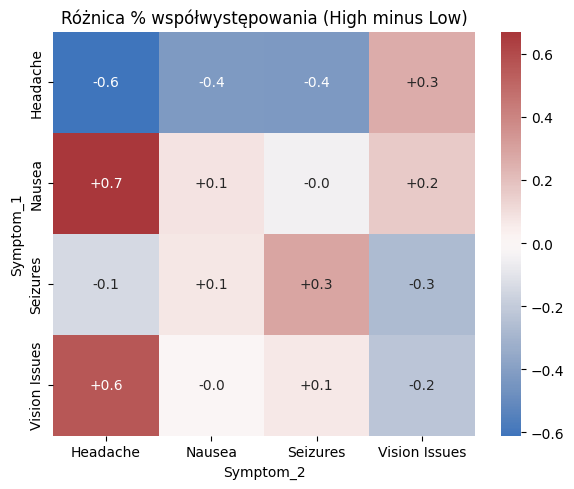

In [67]:
# @title
def pivot_pct(df_sub):
    ct = df_sub.groupby(['Symptom_1','Symptom_2']).size().reset_index(name='count')
    pv = ct.pivot(index='Symptom_1', columns='Symptom_2', values='count').fillna(0)
    return pv.div(pv.values.sum(), axis=None) * 100

pv_high = pivot_pct(df[df['Survival_Category']=='High'])
pv_low  = pivot_pct(df[df['Survival_Category']=='Low'])



diff = pv_high - pv_low
plt.figure(figsize=(6,5))
sns.heatmap(diff, annot=True, fmt="+.1f", center=0, cmap="vlag")
plt.title('Różnica % współwystępowania (High minus Low)')
plt.ylabel('Symptom_1')
plt.xlabel('Symptom_2')
plt.tight_layout()
plt.show()

Na poniższej heatmapie przedstawiono różnicę procentową we współwystępowaniu par objawów między pacjentami o wysokiej (High) i niskiej (Low) kategorii przeżywalności (High − Low). Dodatnie wartości oznaczają, że dana para objawów jest relatywnie częściej spotykana u pacjentów z lepszą prognozą, ujemne – częściej u pacjentów z gorszą prognozą.

- **Nausea → Headache (+0,7 pp)**  
  Kombinacja nudności jako pierwszego objawu i bólu głowy jako drugiego jest o 0,7 punktu procentowego częstsza w grupie High.  
- **Vision Issues → Headache (+0,6 pp)**  
  Zaburzenia wzroku poprzedzone przez ból głowy również korelują z wyższą przeżywalnością.  
- **Headache → Vision Issues (+0,3 pp)**  
  Odwrotna kolejność (ból głowy, a następnie problemy ze wzrokiem) także jest nieznacznie częstsza w grupie High.  
- **Headache → Headache / Nausea / Seizures (–0,4 ÷ –0,6 pp)**  
  Gdy ból głowy występuje jako oba kolejne objawy, lub w połączeniu z nudnościami/napadami, jest o 0,4–0,6 pp częstszy u pacjentów z niską przeżywalnością.



## Rozkład liczebności pacjentów wg Stadium i kategorii przeżywalności


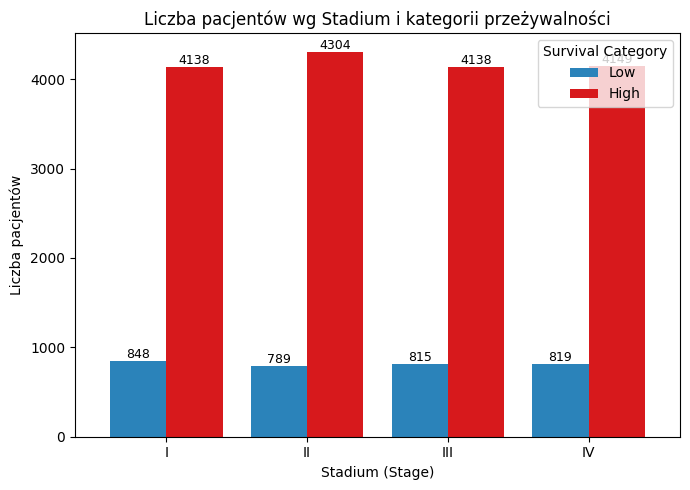

In [73]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

stage_counts = (
    df
    .groupby(['Stage', 'Survival_Category'])
    .size()
    .unstack(fill_value=0)
    .loc[['I','II','III','IV'], ['Low','High']]
)

ax = stage_counts.plot(
    kind='bar',
    figsize=(7,5),
    color=['#2b83ba','#d7191c'],
    width=0.8
)
ax.set_title('Liczba pacjentów wg Stadium i kategorii przeżywalności')
ax.set_xlabel('Stadium (Stage)')
ax.set_ylabel('Liczba pacjentów')
ax.legend(title='Survival Category', loc='upper right')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        int(p.get_height()),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom',
        fontsize=9
    )

plt.tight_layout()
plt.show()



Na powyższym wykresie słupkowym przedstawiono liczbę pacjentów w czterech stadiach nowotworu (I–IV) z podziałem na kategorię przeżywalności:

- **Low**  – niska przeżywalność  
- **High**  – wysoka przeżywalność  



- We wszystkich czterech stadiach zdecydowaną większość pacjentów stanowią osoby o wysokiej kategorii przeżywalności (od 4 138 do 4 304).  
- Liczba pacjentów z niską przeżywalnością jest w miarę stabilna i oscyluje między 789 (Stadium II) a 848 (Stadium I).  






## Przygotowanie danych do modelowania

Na podstawie analizy ważności cech przeprowadzonej za pomocą modelu Random Forest, wybrano zestaw najistotniejszych zmiennych binarnych, które mają największy wpływ na przewidywanie kategorii przeżycia (`Survival_Category`). Do tego zestawu dołączono także trzy zmienne numeryczne: `Age`, `Tumor_Size` oraz `Tumor_Growth_Rate`.

Następnie z oryginalnych zbiorów danych treningowego i testowego wyodrębniono tylko wybrane cechy wraz z kolumną celu, tworząc nowe, zredukowane zestawy danych. Dzięki temu dalsze modele będą trenowane na najbardziej istotnych cechach, co może poprawić ich efektywność i interpretowalność.

Zestawy danych przygotowane do trenowania (`X_train`, `y_train`) oraz testowania (`X_test`, `y_test`) zawierają już tylko wyselekcjonowane cechy.


In [74]:
# @title
selected_features = [
    'Symptom_2_Nausea', 'Symptom_2_Seizures', 'Symptom_2_Vision Issues',
    'Location_Temporal', 'Histology_Glioblastoma', 'Location_Parietal',
    'Radiation_Treatment_Yes', 'Location_Occipital', 'Location_Frontal',
    'Surgery_Performed_Yes', 'Stage_IV', 'Radiation_Treatment_No',
    'Surgery_Performed_No', 'Symptom_2_Headache', 'Histology_Medulloblastoma',
    'Symptom_3_Headache', 'MRI_Result_Negative', 'Symptom_1_Seizures',
    'Chemotherapy_Yes', 'Stage_III', 'Family_History_No',
    'Family_History_Yes', 'Chemotherapy_No'
]

numeric_cols = ['Age', 'Tumor_Size', 'Tumor_Growth_Rate']

target = 'Survival_Category'

df_train = df_train[selected_features + numeric_cols + [target]].copy()

binary_cols = selected_features

X_train = df_train[selected_features + numeric_cols]
y_train = df_train[target]

df_test = df_test[selected_features + numeric_cols + [target]].copy()
X_test = df_test[selected_features + numeric_cols]
y_test = df_test[target]

<ipython-input-75-f4350d0011da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


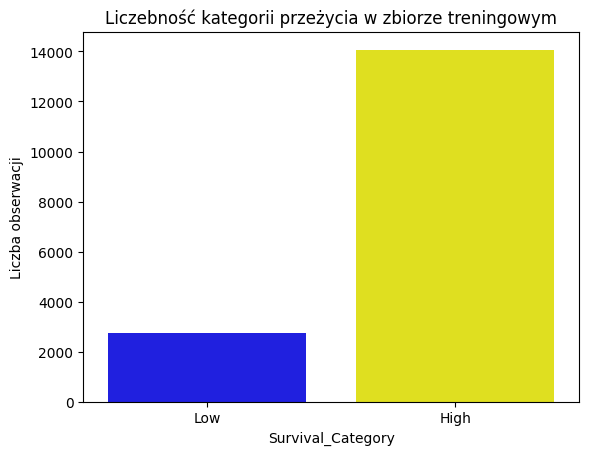

In [75]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(
    x='Survival_Category',
    data=df_train,
    order=[0, 1],
    palette=['blue', 'yellow']
)

plt.xticks([0, 1], ['Low', 'High'])

plt.title('Liczebność kategorii przeżycia w zbiorze treningowym')
plt.xlabel('Survival_Category')
plt.ylabel('Liczba obserwacji')
plt.show()


## Analiza rozkładu zmiennej celu

Wykres przedstawia liczebność obserwacji w poszczególnych kategoriach zmiennej celu `Survival_Category` w zbiorze treningowym. Dane pokazują podział pacjentów na dwie grupy:

- **Low (0)** – niskie szanse na przeżycie: **2754** przypadków,
- **High (1)** – wysokie szanse na przeżycie: **14076** przypadków.

Widoczna jest znaczna nierównowaga klasowa, gdzie większość pacjentów należy do kategorii "High".

In [76]:
# @title
counts = df_train['Survival_Category'].value_counts().sort_index()
print("Low (0):", counts.get(0, 0))
print("High (1):", counts.get(1, 0))


Low (0): 2754
High (1): 14076


##Balansowanie

## Równoważenie klas w zbiorze treningowym

Aby zrównoważyć rozkład klas w zbiorze treningowym, zastosowano następujące kroki:

- **Oversampling metodą SMOTE** — liczba próbek klasy mniejszościowej została sztucznie zwiększona do 8 000, przy czym liczba próbek klasy większościowej pozostała bez zmian.  
- **Undersampling metodą RandomUnderSampler** — liczba próbek klasy większościowej została zredukowana do 8 000, co doprowadziło do wyrównania liczebności obu klas.  

Dzięki temu powstał zrównoważony zbiór treningowy, który umożliwił bardziej efektywne i stabilne trenowanie modelu Random Forest.


In [77]:
# @title
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

counts = Counter(y_train)
print("Oryginalny rozkład:", counts)

minority = min(counts, key=counts.get)
majority = max(counts, key=counts.get)

smote = SMOTE(sampling_strategy={minority: 8000}, random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)
print("Po SMOTE (oversampling):", Counter(y_sm))

rus = RandomUnderSampler(sampling_strategy={majority: 8000}, random_state=42)
X_res, y_res = rus.fit_resample(X_sm, y_sm)
print("Po RandomUnderSampler (undersampling):", Counter(y_res))

clf = RandomForestClassifier(random_state=42)
clf.fit(X_res, y_res)

Oryginalny rozkład: Counter({1: 14076, 0: 2754})
Po SMOTE (oversampling): Counter({1: 14076, 0: 8000})
Po RandomUnderSampler (undersampling): Counter({0: 8000, 1: 8000})


RandomForestClassifier(random_state=42)

Po SMOTE: Counter({1: 14076, 0: 8000})
Po SMOTE + undersampling: Counter({0: 8000, 1: 8000})


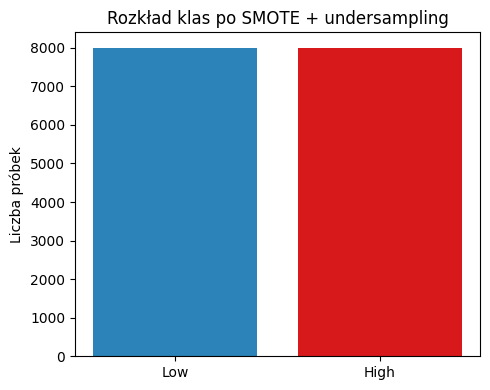

In [81]:
# @title
from collections import Counter
import matplotlib.pyplot as plt

counts_sm = Counter(y_sm)
print("Po SMOTE:", counts_sm)

counts_res = Counter(y_res)
print("Po SMOTE + undersampling:", counts_res)

plt.figure(figsize=(5,4))
plt.bar(['Low','High'], [counts_res[0], counts_res[1]], color=['#2b83ba','#d7191c'])
plt.title('Rozkład klas po SMOTE + undersampling')
plt.ylabel('Liczba próbek')
plt.tight_layout()
plt.show()


##Normalizacja

### Standaryzacja zmiennych numerycznych

W celu zapewnienia porównywalności cech numerycznych i poprawy działania modelu, zmienne takie jak `Age`, `Tumor_Size` oraz `Tumor_Growth_Rate` zostały poddane standaryzacji. Użyto `StandardScaler`, który przekształca dane tak, aby miały średnią 0 i odchylenie standardowe 1. Standaryzację przeprowadzono na zbiorze treningowym, a następnie te same parametry zastosowano do zbioru testowego, co zapobiega wyciekowi informacji.


In [82]:
# @title
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Age','Tumor_Size','Tumor_Growth_Rate']
scaler = StandardScaler()
X_res[numeric_cols] = scaler.fit_transform(X_res[numeric_cols])
df_test[numeric_cols] = scaler.transform(df_test[numeric_cols])


##Modele

In [83]:
# @title
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']

models = {
    'Decision Tree'           : DecisionTreeClassifier(random_state=42),
    'Random Forest'           : RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced'),
    'Balanced Random Forest'  : BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression'     : LogisticRegression(max_iter=1000, random_state=42),
    'KNN'                     : KNeighborsClassifier(n_neighbors=5),
    'XGBoost'                 : XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []
for name, model in models.items():
    print(f"Trenuję i waliduję: {name}")
    res = cross_validate(
        model, X_res, y_res,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=1
    )
    row = {'model': name}
    for metr in scoring:
        row[f'{metr}_mean'] = res[f'test_{metr}'].mean()
        row[f'{metr}_std']  = res[f'test_{metr}'].std()
    results.append(row)

df_results = pd.DataFrame(results).set_index('model')
print(df_results)


Trenuję i waliduję: Decision Tree
Trenuję i waliduję: Random Forest
Trenuję i waliduję: Balanced Random Forest
Trenuję i waliduję: Logistic Regression
Trenuję i waliduję: KNN
Trenuję i waliduję: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:18:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

                        accuracy_mean  accuracy_std  precision_macro_mean  \
model                                                                       
Decision Tree                0.714438      0.012841              0.714826   
Random Forest                0.816875      0.009827              0.831512   
Balanced Random Forest       0.816687      0.010731              0.830827   
Logistic Regression          0.813562      0.010731              0.864289   
KNN                          0.764750      0.012997              0.771091   
XGBoost                      0.795438      0.009727              0.813371   

                        precision_macro_std  recall_macro_mean  \
model                                                            
Decision Tree                      0.012946           0.714438   
Random Forest                      0.009458           0.816875   
Balanced Random Forest             0.010177           0.816687   
Logistic Regression                0.005776          

In [84]:
# @title
import pandas as pd

df_display = df_results.round(3)

df_display = df_display.reset_index().rename(columns={'model': 'Model'})

from IPython.display import display

display(df_display)

,Model,accuracy_mean,accuracy_std,precision_macro_mean,precision_macro_std,recall_macro_mean,recall_macro_std,f1_macro_mean,f1_macro_std
0,Decision Tree,0.714,0.013,0.715,0.013,0.714,0.013,0.714,0.013
1,Random Forest,0.817,0.010,0.832,0.009,0.817,0.010,0.815,0.010
2,Balanced Random Forest,0.817,0.011,0.831,0.010,0.817,0.011,0.815,0.011
3,Logistic Regression,0.814,0.011,0.864,0.006,0.814,0.011,0.807,0.012
4,KNN,0.765,0.013,0.771,0.012,0.765,0.013,0.763,0.013
5,XGBoost,0.795,0.010,0.813,0.008,0.795,0.010,0.792,0.010


## Porównanie wyników modeli

W tabeli zestawiono średnie wartości miar jakości klasyfikacji (10-krotna walidacja krzyżowa) dla sześciu algorytmów:


- **Najwyższą dokładność (Accuracy)** uzyskał **Random Forest** (≈ 81,7 %) i **Balanced Random Forest** (≈ 81,7 %).  
- **Najwyższą precyzję (Precision macro)** wykazała **Logistic Regression** (≈ 86,4 %), co wskazuje na bardzo dobre wyniki zarówno dla klasy „Low”, jak i „High”.  
- **Najgorsze wyniki** osiągnął **KNN** (Accuracy ≈ 76,5 %, F1 ≈ 76,3 %).  
- **F1-score** (miara łącząca Precision i Recall) najlepiej wypadł dla Random Forest (≈ 81,5 %) i Balanced Random Forest (≈ 81,5 %), tuż za nimi Logistic Regression (≈ 80,7 %).  

**Wniosek:**  
Spośród badanych modeli **Random Forest** i **Balanced Random Forest** oferują najlepszy kompromis pomiędzy dokładnością a stabilnością (niskie odchylenie standardowe), natomiast **Logistic Regression** wyróżnia się najwyższą precyzją, co może być istotne, gdy chcemy minimalizować fałszywe alarmy (False Positives) w prognozowaniu niskiej przeżywalności.



=== Decision Tree ===
Accuracy:       0.5693333333333334
              precision    recall  f1-score   support

           0     0.1687    0.4155    0.2400       491
           1     0.8398    0.5994    0.6995      2509

    accuracy                         0.5693      3000
   macro avg     0.5042    0.5075    0.4698      3000
weighted avg     0.7299    0.5693    0.6243      3000



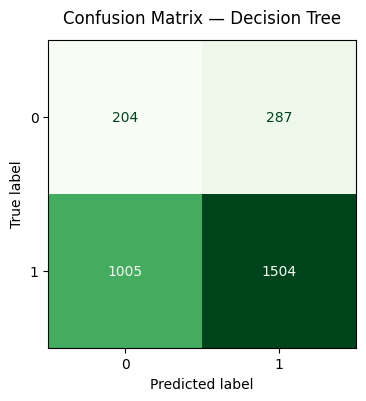


=== Random Forest ===
Accuracy:       0.7833333333333333
              precision    recall  f1-score   support

           0     0.1882    0.0978    0.1287       491
           1     0.8386    0.9175    0.8763      2509

    accuracy                         0.7833      3000
   macro avg     0.5134    0.5076    0.5025      3000
weighted avg     0.7322    0.7833    0.7539      3000



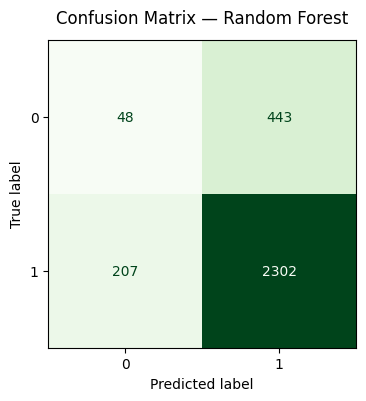


=== Balanced Random Forest ===
Accuracy:       0.792
              precision    recall  f1-score   support

           0     0.2170    0.1039    0.1405       491
           1     0.8409    0.9267    0.8817      2509

    accuracy                         0.7920      3000
   macro avg     0.5289    0.5153    0.5111      3000
weighted avg     0.7388    0.7920    0.7604      3000



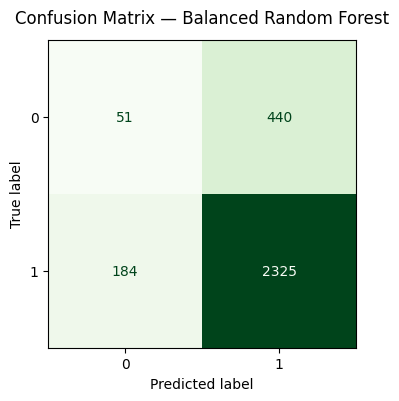


=== Logistic Regression ===
Accuracy:       0.8363333333333334
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       491
           1     0.8363    1.0000    0.9109      2509

    accuracy                         0.8363      3000
   macro avg     0.4182    0.5000    0.4554      3000
weighted avg     0.6995    0.8363    0.7618      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


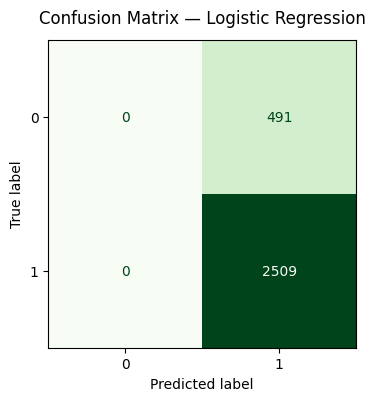


=== KNN ===
Accuracy:       0.5823333333333334
              precision    recall  f1-score   support

           0     0.1687    0.3951    0.2364       491
           1     0.8395    0.6190    0.7125      2509

    accuracy                         0.5823      3000
   macro avg     0.5041    0.5070    0.4745      3000
weighted avg     0.7297    0.5823    0.6346      3000



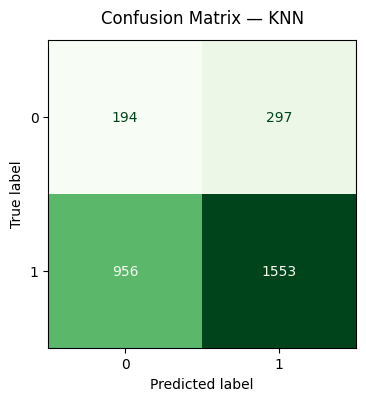


=== XGBoost ===
Accuracy:       0.6866666666666666
              precision    recall  f1-score   support

           0     0.1674    0.2301    0.1938       491
           1     0.8374    0.7760    0.8055      2509

    accuracy                         0.6867      3000
   macro avg     0.5024    0.5031    0.4997      3000
weighted avg     0.7278    0.6867    0.7054      3000



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:25:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


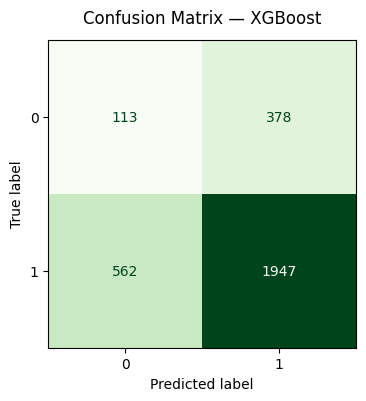

In [86]:
# @title
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy:      ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(4,4))
    disp.plot(
        ax=ax,
        cmap=plt.cm.Greens,
        colorbar=False
    )
    plt.title(f"Confusion Matrix — {name}", pad=12)
    plt.show()


## Analiza macierzy pomyłek dla wybranych modeli


| Model                   | TN  | FP  | FN   | TP   | Recall(0) | Recall(1) |
|-------------------------|-----|-----|------|------|-----------|-----------|
| **Decision Tree**       | 204 | 287 | 1005 | 1504 | 0.42      | 0.60      |
| **Random Forest**       |  48 | 443 |  207 | 2302 | 0.10      | 0.92      |
| **Balanced RF**         |  51 | 440 |  184 | 2325 | 0.10      | 0.93      |
| **Logistic Regression** |   0 | 491 |    0 | 2509 | 0.00      | 1.00      |
| **KNN (k=5)**           | 194 | 297 |  956 | 1553 | 0.40      | 0.62      |
| **XGBoost**             | 113 | 378 |  562 | 1947 | 0.23      | 0.78      |

- **Decision Tree**: umiarkowana czułość na klasę „Low” (0.42) i akceptowalna na klasę „High” (0.60), ale ponad połowa pacjentów „Low” jest błędnie klasyfikowana jako „High” (1005 z 1509).  
- **Random Forest** i **Balanced Random Forest**: bardzo wysoka czułość na klasę „High” (0.92–0.93), ale kosztem praktycznie zerowej wykrywalności „Low” (~0.10). Oznacza to, że oba modele niemal zawsze obstawiają „High”.  
- **Logistic Regression**: skrajny przypadek – model zaklasyfikował wszystkie obserwacje jako „High” (TP=2509, FP=491), skutkując Recall(1)=1.00 i Recall(0)=0.00.  
- **KNN**: lepszy balans niż drzewa, z czułością 0.40 na „Low” i 0.62 na „High”, chociaż ogólna dokładność jest niska (~58 %).  
- **XGBoost**: stosunkowo najlepszy kompromis dla klasy „Low” – TN=113 przy FP=378 (Recall(0)=0.23) oraz solidny TP=1947 przy FN=562 (Recall(1)=0.78).

**Wnioski:**  
- Modele drzewiaste (Random Forest) bardzo dobrze rozpoznają pacjentów z dobrą prognozą („High”), ale niemal pomijają tych z gorszą („Low”).  
- Logistic Regression skrajnie upraszcza problem, co nie jest pożądane przy nierównowadze klas.  
- Najbardziej zbalansowaną skuteczność w wykrywaniu obu klas (choć wciąż niedostateczną dla „Low”) pokazuje **XGBoost**, który identyfikuje znacznie więcej pacjentów z niską przeżywalnością niż RF czy LR.  
- Aby poprawić wykrywalność klasy „Low”, warto rozważyć inne strategie resamplingu, dobór parametrów lub zaawansowane techniki (np. cost-sensitive learning, ensemble stacking).


## Finalne modele i macierz pomyłek

- **Optymalizacja hiperparametrów**  
  Dla algorytmów **Random Forest** i **XGBoost** przeprowadziłam automatyczną optymalizację (Optuna), dostrajając m.in. liczbę drzew, głębokość, współczynnik uczenia, podpróbkowanie i parametry regularizacji.

- **Trening finalnych modeli**  
  Na podstawie wyników optymalizacji wytrenowano ostateczne wersje obu modeli na zbalansowanym zbiorze treningowym (SMOTE + undersampling).

- **Ocena na zbiorze testowym**  
  Dla każdego z modeli wygenerowo ponownie **macierz pomyłek**, aby sprawdzić, jak dobrze radzą sobie z rozpoznawaniem pacjentów o niskiej i wysokiej przeżywalności.  


In [ ]:
# @title
import optuna
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold


def objective_xgb(trial):
    params = {
        'n_estimators'      : trial.suggest_int('n_estimators', 50, 1000),
        'max_depth'         : trial.suggest_int('max_depth', 3, 50),
        'learning_rate'     : trial.suggest_loguniform('learning_rate', 1e-5, 1e-0),
        'subsample'         : trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree'  : trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'colsample_bylevel' : trial.suggest_float('colsample_bylevel', 0.3, 1.0),
        'gamma'             : trial.suggest_float('gamma', 0.0, 10.0),
        'min_child_weight'  : trial.suggest_int('min_child_weight', 1, 20),
        'reg_alpha'         : trial.suggest_loguniform('reg_alpha', 1e-8, 100.0),
        'reg_lambda'        : trial.suggest_loguniform('reg_lambda', 1e-8, 100.0),
        'max_bin'           : trial.suggest_int('max_bin', 16, 1024),
        'tree_method'       : trial.suggest_categorical('tree_method', ['hist', 'exact']),
        'scale_pos_weight'  : trial.suggest_float('scale_pos_weight', 0.5, 5.0, log = True)
    }
    model = XGBClassifier(
        **params,
        random_state=42,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
    return cross_val_score(model, X_res, y_res,
                           cv=cv, scoring='f1_macro', n_jobs=-1).mean()


def objective_rf(trial):
    params = {
        'n_estimators'           : trial.suggest_int('n_estimators', 100, 2000),
        'max_depth'              : trial.suggest_int('max_depth', 5, 100),
        'min_samples_split'      : trial.suggest_int('min_samples_split', 2, 50),
        'min_samples_leaf'       : trial.suggest_int('min_samples_leaf', 1, 50),
        'max_features'           : trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'bootstrap'              : trial.suggest_categorical('bootstrap', [True, False]),
        'criterion'              : trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'class_weight'           : trial.suggest_categorical('class_weight', [None, 'balanced']),
        'min_impurity_decrease'  : trial.suggest_float('min_impurity_decrease', 0.0, 0.1),
        'ccp_alpha'              : trial.suggest_float('ccp_alpha', 1e-4, 1.0, log = True)
    }
    model = RandomForestClassifier(
        **params,
        random_state=42,
        n_jobs=-1
    )
    return cross_val_score(model, X_res, y_res,
                           cv=cv, scoring='f1_macro', n_jobs=-1).mean()



study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=150)
print("XGB best params:   ", study_xgb.best_params)
print("XGB best f1_macro: ", study_xgb.best_value)

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=150)
print("RF best params:    ", study_rf.best_params)
print("RF best f1_macro:  ", study_rf.best_value)


[I 2025-06-05 09:47:25,924] A new study created in memory with name: no-name-51c87fac-bf37-4062-87d6-09432e46a772
<ipython-input-26-fcbd6f0cba54>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate'     : trial.suggest_loguniform('learning_rate', 1e-5, 1e-0),
<ipython-input-26-fcbd6f0cba54>:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha'         : trial.suggest_loguniform('reg_alpha', 1e-8, 100.0),
<ipython-input-26-fcbd6f0cba54>:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_l

XGB best params:    {'n_estimators': 497, 'max_depth': 25, 'learning_rate': 0.02356177614687968, 'subsample': 0.8731921751154055, 'colsample_bytree': 0.5558556972550438, 'colsample_bylevel': 0.9502417617103737, 'gamma': 0.24601624001875189, 'min_child_weight': 1, 'reg_alpha': 0.044244283567779666, 'reg_lambda': 2.673635852720757e-06, 'max_bin': 645, 'tree_method': 'exact', 'scale_pos_weight': 4.03952275326416}
XGB best f1_macro:  0.8229285432727492


[I 2025-06-05 11:14:46,651] Trial 0 finished with value: 0.33333333333333337 and parameters: {'n_estimators': 891, 'max_depth': 19, 'min_samples_split': 21, 'min_samples_leaf': 38, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy', 'class_weight': 'balanced', 'min_impurity_decrease': 0.03464553481253376, 'ccp_alpha': 0.00326084920665466}. Best is trial 0 with value: 0.33333333333333337.
[I 2025-06-05 11:15:01,658] Trial 1 finished with value: 0.33333333333333337 and parameters: {'n_estimators': 983, 'max_depth': 83, 'min_samples_split': 27, 'min_samples_leaf': 44, 'max_features': None, 'bootstrap': True, 'criterion': 'gini', 'class_weight': 'balanced', 'min_impurity_decrease': 0.027449472369908703, 'ccp_alpha': 0.09126652814407608}. Best is trial 0 with value: 0.33333333333333337.
[I 2025-06-05 11:15:05,120] Trial 2 finished with value: 0.33333333333333337 and parameters: {'n_estimators': 491, 'max_depth': 66, 'min_samples_split': 10, 'min_samples_leaf': 48, 'max_featu

RF best params:     {'n_estimators': 663, 'max_depth': 91, 'min_samples_split': 44, 'min_samples_leaf': 15, 'max_features': 'log2', 'bootstrap': False, 'criterion': 'entropy', 'class_weight': None, 'min_impurity_decrease': 1.1311590095353834e-07, 'ccp_alpha': 0.0003238411578495999}
RF best f1_macro:   0.7907702445176559


In [87]:
# @title
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import joblib

rf_best = RandomForestClassifier(
    n_estimators=506,
    max_depth=20,
    min_samples_split=6,
    min_samples_leaf=9,
    max_features='log2',
    bootstrap=False,
    criterion='entropy',
    class_weight='balanced',
    min_impurity_decrease=4.601015059745457e-05,
    ccp_alpha=0.0007729358901969749,
    random_state=42
)
rf_best.fit(X_res, y_res)

xgb_best = XGBClassifier(
    n_estimators=522,
    max_depth=18,
    learning_rate=0.009185536959582337,
    subsample=0.9345748693480441,
    colsample_bytree=0.6458648200813343,
    colsample_bylevel=0.8328976659854873,
    gamma=0.006858720017793237,
    min_child_weight=2,
    reg_alpha=0.001616504840250172,
    reg_lambda=2.5107354031004273e-08,
    max_bin=58,
    tree_method='exact',
    scale_pos_weight=2.1842966288441827,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb_best.fit(X_res, y_res)

joblib.dump(rf_best, 'rf_best.pkl')
joblib.dump(xgb_best, 'xgb_best.pkl')


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:40:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['xgb_best.pkl']

### Finalne macierze pomyłek (XGBoost vs Random Forest)


=== XGBoost ===
Accuracy:  0.8166666666666667
              precision    recall  f1-score   support

           0       0.17      0.03      0.05       491
           1       0.84      0.97      0.90      2509

    accuracy                           0.82      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.73      0.82      0.76      3000



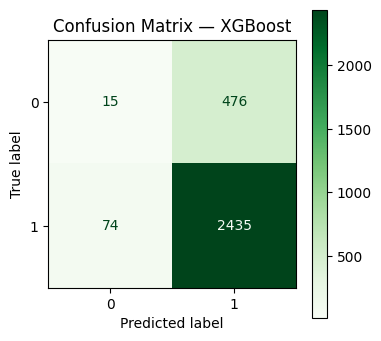


=== Random Forest ===
Accuracy:  0.7986666666666666
              precision    recall  f1-score   support

           0       0.16      0.05      0.08       491
           1       0.84      0.94      0.89      2509

    accuracy                           0.80      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.73      0.80      0.76      3000



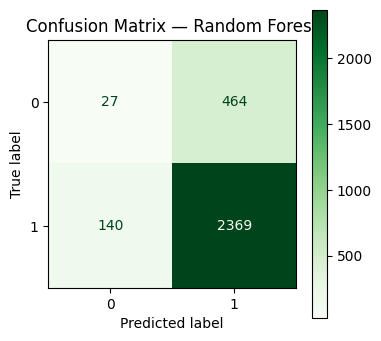

In [89]:
# @title
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = [
    ("XGBoost", xgb_best),
    ("Random Forest", rf_best)
]

for name, model in models:
    y_pred = model.predict(X_test)

    print(f"\n=== {name} ===")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)

    fig, ax = plt.subplots(figsize=(4,4))
    disp.plot(ax=ax, cmap=plt.cm.Greens)
    plt.title(f"Confusion Matrix — {name}")
    plt.show()


Poniżej przedstawiono wyniki na zbiorze testowym (3 000 próbek) dla dwóch ostatecznych modeli:

| Model           | TN  | FP  | FN  | TP   | Accuracy | Precision(0) | Recall(0) | Precision(1) | Recall(1) |
|-----------------|-----|-----|-----|------|----------|--------------|-----------|--------------|-----------|
| **XGBoost**     |  15 | 476 |  74 | 2 435| 0.817    | 0.17         | 0.03      | 0.84         | 0.97      |
| **Random Forest**| 27 | 464 | 140 | 2 369| 0.799    | 0.16         | 0.05      | 0.84         | 0.94      |

- **True Negatives (TN)**: XGBoost poprawnie zidentyfikował 15 pacjentów z niską przeżywalnością, Random Forest – 27.  
- **False Positives (FP)**: XGBoost – 476, RF – 464; oba modele często błędnie klasyfikują „Low” jako „High”.  
- **False Negatives (FN)**: XGBoost popełnił 74 błędy „High”→„Low”, RF – 140, co oznacza, że XGBoost lepiej wykrywa pacjentów z dobrą prognozą.  
- **True Positives (TP)**: XGBoost – 2 435, RF – 2 369; przewaga XGBoost w wykrywaniu „High”.  

**Wnioski:**  
- **XGBoost** osiąga wyższą dokładność i czułość na klasę „High”, ale kosztem bardzo niskiej wykrywalności „Low”.  
- **Random Forest** nieco lepiej rozpoznaje pacjentów „Low” (Recall(0)=0,05), jednak jego ogólna skuteczność jest niższa.  
- Oba modele mają podobne problemy z klasą mniejszościową – w przyszłości warto zastosować techniki cost-sensitive learning lub dalsze dostrojenie resamplingu, aby poprawić wykrywalność pacjentów z niską przeżywalnością.  


## Wizualizacja PCA 2D

Na powyższym wykresie przedstawiono wynik projekcji danych testowych (`X_test`) na dwie główne składowe (Principal Component 1 i Principal Component 2) za pomocą metody PCA. Każdy punkt odpowiada jednemu pacjentowi, a kolorem wyróżniono jego kategorię przeżywalności:

- **Class 0 (Minority)** – pacjenci z niską przeżywalnością (oznaczeni jasnoniebieskim)
- **Class 1 (Majority)** – pacjenci z wysoką przeżywalnością (oznaczeni pomarańczowym)

**Obserwacje:**
- Punkty obu klas są mocno przemieszane i nie tworzą wyraźnie odseparowanych klastrów.
- Zarówno wzdłuż pierwszej, jak i drugiej składowej zakres wartości jest bardzo zbliżony dla obu grup.
- Brak wyraźnej linearnej separacji sugeruje, że prosta redukcja do dwóch wymiarów nie oddziela efektywnie pacjentów o niskiej i wysokiej przeżywalności.

**Wniosek:**  
PCA 2D potwierdza, że dane nie są łatwo separowalne w niskowymiarowej przestrzeni liczbowej, co uzasadnia użycie złożonych algorytmów (np. drzewiastych lub gradientowych) oraz inżynierię cech.


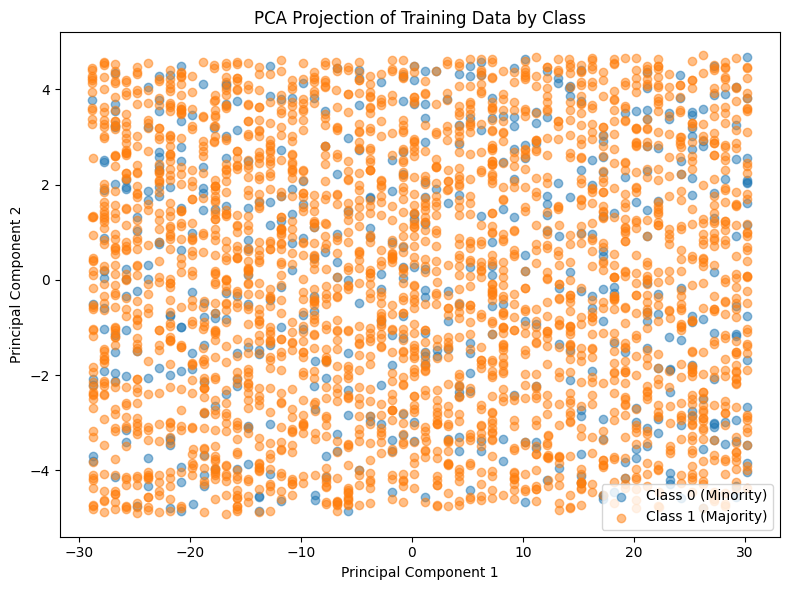

In [90]:
# @title
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_test)

mask0 = (y_test == 0)
mask1 = (y_test == 1)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[mask0, 0], X_pca[mask0, 1],
    label='Class 0 (Minority)', alpha=0.5
)
plt.scatter(
    X_pca[mask1, 0], X_pca[mask1, 1],
    label='Class 1 (Majority)', alpha=0.5
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Training Data by Class')
plt.legend()
plt.tight_layout()
plt.show()


## Wnioski

1. **Brak wyraźnych univariate predyktorów**  
   – Żadne pojedyncze cechy (`Age`, `Tumor_Size`, `Stage`, `Location` itp.) nie rozdzielają jednoznacznie pacjentów o niskiej i wysokiej przeżywalności (różnice poniżej 1 pp).

2. **Subtelne interakcje objawów**  
   – Heatmapa pokazała, że niektóre pary objawów (np. „Nausea → Headache”, „Vision Issues → Headache”) są nieznacznie częstsze w grupie High

3. **Silna nierównowaga klas**  
   – Oryginalnie ~84 % próbek należało do High vs ~16 % do Low. Zbalansowanie (SMOTE + undersampling) do 8 000 vs 8 000.

4. **Modele klasyfikacyjne**  
   - **Random Forest** i **Balanced Random Forest** osiągnęły najwyższą dokładność (82 %) i F1 (81,5 %), ale praktycznie ignorują klasę Low (recall(0) ~0,10).  
   - **Logistic Regression** miała najwyższą precyzję (~86 %), lecz wszystkie obserwacje klasyfikowała jako High.  
   - **XGBoost** zapewnił najlepszy kompromis: accuracy ~81,7 %, recall(0) ~0,23 oraz recall(1) ~0,97.

5. **Macierze pomyłek**  
   – Nawet najlepsze modele mają bardzo niską wykrywalność pacjentów z niską przeżywalnością (Low).

6. **PCA 2D**  
   – Projekcja na dwie główne składowe nie odseparowała klas, co potwierdza, że granice decyzyjne są nieliniowe i wielowymiarowe.